## Feature Selection 

https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection/notebook

#### Filter Methods

    Basic methods

    Univariate methods

    Information gain

    Fischer score

    Correlation Matrix with Heatmap

#### Wrapper Methods

    Forward Selection

    Backward Elimination

    Exhaustive Feature Selection

    Recursive Feature Elimination

    Recursive Feature Elimination with Cross-Validation

#### Embedded Methods


    LASSO

    RIDGE

    Tree Importance

### 1- Filter Methods

**Basic methods**

We remove constant/quasi-constant features

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Data/CS'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
X_train = pd.read_csv('./Data/CS/train.csv',nrows=35000)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Columns: 371 entries, ID to TARGET
dtypes: float64(103), int64(268)
memory usage: 99.1 MB


In [4]:
X_test = pd.read_csv('./Data/CS/test.csv', nrows=15000)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 370 entries, ID to var38
dtypes: float64(99), int64(271)
memory usage: 42.3 MB


In [5]:
y_train = X_train[['TARGET']]
X_train.drop('TARGET',inplace=True,axis=1)

In [6]:
X_train.shape, X_test.shape

((35000, 370), (15000, 370))

In [7]:
X_train

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.00,195.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,69974,2,48,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98642.430000
34996,69976,2,65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128930.100000
34997,69977,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
34998,69981,2,28,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114747.060000


In [8]:
# using sklearn variancethreshold to find constant features

from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0)
sel.fit(X_train)

sum(sel.get_support()) # get not constant features

319

In [9]:
# get constant features
print(len([x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]))

51


In [10]:
X_train_t = sel.transform(X_train)

In [11]:
X_train.shape[1]

370

In [12]:
#Removing quasi-constant features

sel = VarianceThreshold(threshold=0.01)
sel.fit(X_train)  # fit finds the features with low variance

VarianceThreshold(threshold=0.01)

In [13]:
sum(sel.get_support())
len([x for x in X_train.columns if x not in X_train.columns[sel.get_support()]])

107

In [14]:
X_train['ind_var31'].value_counts() / np.float(len(X_train))

0    0.996286
1    0.003714
Name: ind_var31, dtype: float64

In [15]:
# we can then remove the features from training and test set
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

**Univariate selection methods**

There are 4 methods that fall under this category :

- SelectKBest
- SelectPercentile
- SelectFpr, SelectFdr, or family wise error SelectFwe
- GenericUnivariateSelection

In [16]:
# Select KBEST

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_iris(return_X_y=True)
X.shape[1]

4

In [17]:
X_new = SelectKBest(chi2,k=2).fit_transform(X,y)
X_new.shape[1]

2

In [18]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
X= load_digits()['data']
y =load_digits()['target']

In [19]:
X.shape[1]

64

In [20]:
X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)
X_new.shape

(1797, 7)

**Information Gain / Mutual Information**

**mutual_info_classif**

It estimates mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

This function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

It can be used for univariate features selection.

**mutual_info_regression**

Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

It can be used for univariate features selection

**Fischer Score**

In [21]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

In [22]:
iris = load_iris()

X= iris.data
y = iris.target

X.astype(int)

array([[5, 3, 1, 0],
       [4, 3, 1, 0],
       [4, 3, 1, 0],
       [4, 3, 1, 0],
       [5, 3, 1, 0],
       [5, 3, 1, 0],
       [4, 3, 1, 0],
       [5, 3, 1, 0],
       [4, 2, 1, 0],
       [4, 3, 1, 0],
       [5, 3, 1, 0],
       [4, 3, 1, 0],
       [4, 3, 1, 0],
       [4, 3, 1, 0],
       [5, 4, 1, 0],
       [5, 4, 1, 0],
       [5, 3, 1, 0],
       [5, 3, 1, 0],
       [5, 3, 1, 0],
       [5, 3, 1, 0],
       [5, 3, 1, 0],
       [5, 3, 1, 0],
       [4, 3, 1, 0],
       [5, 3, 1, 0],
       [4, 3, 1, 0],
       [5, 3, 1, 0],
       [5, 3, 1, 0],
       [5, 3, 1, 0],
       [5, 3, 1, 0],
       [4, 3, 1, 0],
       [4, 3, 1, 0],
       [5, 3, 1, 0],
       [5, 4, 1, 0],
       [5, 4, 1, 0],
       [4, 3, 1, 0],
       [5, 3, 1, 0],
       [5, 3, 1, 0],
       [4, 3, 1, 0],
       [4, 3, 1, 0],
       [5, 3, 1, 0],
       [5, 3, 1, 0],
       [4, 2, 1, 0],
       [4, 3, 1, 0],
       [5, 3, 1, 0],
       [5, 3, 1, 0],
       [4, 3, 1, 0],
       [5, 3, 1, 0],
       [4, 3,

In [23]:
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(X, y)

In [24]:
# View results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2


**Anova F for Regression**

In [25]:
from sklearn.feature_selection import f_classif,f_regression

X = load_iris().data
y = load_iris().target

In [26]:
fvalue_selector = SelectKBest(f_regression, k=2)
X_kbest = fvalue_selector.fit_transform(X, y)

In [27]:
# View results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2


In [28]:
# Load iris data
from sklearn.datasets import load_iris
iris = load_iris()

# Create features and target
X = iris.data
y = iris.target

In [29]:
# Convert feature matrix into DataFrame
df = pd.DataFrame(X)

# View the data frame
print(df)

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [30]:
# Create correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

          0         1         2         3
0  1.000000 -0.117570  0.871754  0.817941
1 -0.117570  1.000000 -0.428440 -0.366126
2  0.871754 -0.428440  1.000000  0.962865
3  0.817941 -0.366126  0.962865  1.000000


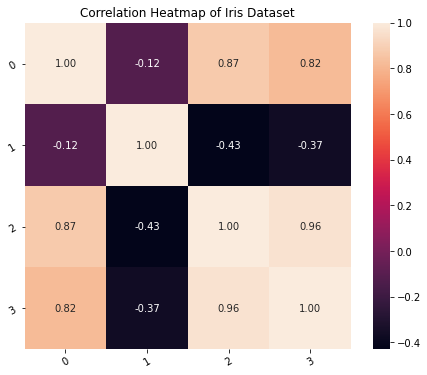

In [31]:
# Create correlation heatmap
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap of Iris Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show() 

In [32]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
upper

,0,1,2,3
0,NaN,-0.11757,0.871754,0.817941
1,NaN,NaN,-0.428440,-0.366126
2,NaN,NaN,NaN,0.962865
3,NaN,NaN,NaN,NaN


In [33]:
to_drop = [column for column in upper.columns if any(upper[column]>0.9)]
print(to_drop)

[3]


In [34]:
df1 = df.drop(df.columns[to_drop],axis=1)
df1.head()

,0,1,2
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


**Wrapper Methods**

In wrapper methods, we try to use a subset of features and train a model using them. Based on the inferences that we draw from the previous model, we decide to add or remove features from the subset. The problem is essentially reduced to a search problem. These methods are usually computationally very expensive.

Some common examples of wrapper methods are

- Forward selection
- Backward elimination
- Exhaustive feature selection
- Recursive feature elimination.
- Recursive feature elimination with cross-validation

In [35]:
# step forward feature selection

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.feature_selection import SequentialFeatureSelector as SFS

In [36]:
data = pd.read_csv('./Data/HP/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [38]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [39]:
# Removing correlated features
threshold = 0.8
correlated_columns =[]
corr_matrix = data.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j])>threshold:
            name = corr_matrix.columns[i]
            correlated_columns.append(name)
            
correlated_columns = set(correlated_columns)
X_train = X_train.drop(correlated_columns,axis=1)
X_test = X_test.drop(correlated_columns,axis=1)

print(X_train.shape, X_test.shape)

(1022, 33) (438, 33)


In [40]:
X_train.fillna(0, inplace=True)

In [41]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [42]:
sfs1 = SFS(RandomForestRegressor(), 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1.fit(np.array(X_train), y=y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   27.1s finished

[2023-02-10 20:25:32] Features: 1/10 -- score: 0.6679670690190654[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   27.7s finished

[2023-02-10 20:25:59] Features: 2/10 -- score: 0.7213980735040745[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:   30.3s finished

[2023-02-10 20:26:30] Features: 3/10 -- score: 0.745934938664322[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

SequentialFeatureSelector(cv=3, estimator=RandomForestRegressor(),
                          k_features=10, scoring='r2', verbose=2)

In [43]:
list(X_train.columns[list(sfs1.k_feature_idx_)])

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'BsmtFinSF1',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'GarageCars']

In [ ]:
# step backward feature elimination

sfs1 = SFS(RandomForestRegressor(), 
           k_features=10, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

X_train.columns[list(sfs1.k_feature_idx_)]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:  1.8min finished

[2023-02-10 20:32:25] Features: 32/10 -- score: 0.8586123222234975[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:  1.5min finished

[2023-02-10 20:33:58] Features: 31/10 -- score: 0.8589305513270044[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:  1.5min finished

[2023-02-10 20:35:28] Features: 30/10 -- score: 0.8640517395970381[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

**Embedded Methods**

*Lasso Regression*

In [ ]:
#load libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

In [ ]:
lasso = Lasso(alpha=100).fit(scaler.transform(X_train.fillna(0)),y_train)
lasso

In [ ]:
lasso.coef_==0

In [ ]:
selected_feat = X_train.columns[(lasso.coef_==0)]
selected_feat

In [ ]:
selected_feat = X_train.columns[(lasso.coef_!=0)]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(lasso.coef_==0)))

In [ ]:
# Other way

sel_ = SelectFromModel(Lasso(alpha=100))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

sel_.get_support()

In [ ]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

*Random Forests Importance*

In [ ]:
# Import libraries
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('./Data/mushrooms.csv')
X = df.drop(['class'], axis = 1)
y = df['class']

In [ ]:
X = pd.get_dummies(X, prefix_sep='_')
y = LabelEncoder().fit_transform(y)

In [ ]:
X.shape

In [ ]:
# Normalize feature vector
X2 = StandardScaler().fit_transform(X)
len(X2[0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.30, random_state = 0)

In [ ]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the classifier to the training set
clf.fit(X_train, y_train)

In [ ]:
# predict on the test set
y_pred = clf.predict(X_test)

In [ ]:
# visualize feature importance
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
feat = pd.Series(clf.feature_importances_,index=X.columns)
feat.nlargest(50).plot(kind='barh')

In [ ]:
X = df.drop(['class'], axis = 1)
y = df['class']
X = pd.get_dummies(X, prefix_sep='_')

In [ ]:
selec = list(feat[feat>0.01].index)
X = StandardScaler().fit_transform(X[selec])
X

## Principal Components Regression // PCA

https://towardsdatascience.com/principal-component-regression-clearly-explained-and-implemented-608471530a2f

https://analyticsindiamag.com/a-hands-on-guide-to-principal-component-regression-in-python/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

df = pd.read_csv('./Data/winequality-red.csv', sep=';')

target = 'quality'
X = df.drop(target,axis=1)
X = pd.get_dummies(X, prefix_sep='_')
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
X_train_scaled = scale(X_train.fillna(0))
X_test_scaled = scale(X_test.fillna(0))

In [ ]:
X_train_scaled

In [ ]:
cv = KFold(n_splits = 10,shuffle=True,random_state=0 )
# Linear Regression
lin_reg = LinearRegression().fit(X_train_scaled, y_train)
lr_score_train = -1* cross_val_score(lin_reg, X_train_scaled, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
lr_score_test = mean_squared_error(y_test, lin_reg.predict(X_test_scaled), squared=False)
print('Linear Regression Score: {}'.format(lr_score_test))

# Lasso Regression
lasso_reg = LassoCV().fit(X_train_scaled, y_train)
lasso_score_train = -1 * cross_val_score(lasso_reg, X_train_scaled, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
lasso_score_test = mean_squared_error(y_test, lasso_reg.predict(X_test_scaled), squared=False)
print('Lasso Regression Score: {}'.format(lasso_score_test))

# Ridge Regression
ridge_reg = RidgeCV().fit(X_train_scaled, y_train)
ridge_score_train = -1 * cross_val_score(ridge_reg, X_train_scaled, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
ridge_score_test = mean_squared_error(y_test, ridge_reg.predict(X_test_scaled), squared=False)
print('Ridge Regression Score: {}'.format(ridge_score_test))

In [ ]:
pca = PCA()
X_train_pc = pca.fit_transform(X_train_scaled)
# View first 5 rows of all principal components
pd.DataFrame(pca.components_.T).loc[:10,:10]

In [ ]:
pca.explained_variance_ratio_

The number of principal components (k) to be used in our model is typically determined by
cross-validation and visual analysis.

In [ ]:
lin_reg = LinearRegression()
rmse_list = []

for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg, 
                                      X_train_pc[:,:i], # Use first k principal components
                                      y_train, 
                                      cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)
    
plt.plot(rmse_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('RMSE')
plt.title('Quality')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=lr_score_train, color='g', linestyle='-');

In [ ]:
best_pc_num = 9

# Train model with first 9 principal components
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

# Get cross-validation RMSE (train set)
pcr_score_train = -1 * cross_val_score(lin_reg_pc, 
                                       X_train_pc[:,:best_pc_num], 
                                       y_train, 
                                       cv=cv, 
                                       scoring='neg_root_mean_squared_error').mean()


# Get first 9 principal components of test set
X_test_pc = pca.transform(X_test_scaled)[:,:best_pc_num]

# Predict on test data
y_pred = lin_reg_pc.predict(X_test_pc)
pcr_score_test_9 = mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
# Train model with first 7 principal components
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:7], y_train)

# Get cross-validation RMSE (train set)
pcr_score_train = -1 * cross_val_score(lin_reg_pc, 
                                       X_train_pc[:,:7], 
                                       y_train, 
                                       cv=cv, 
                                       scoring='neg_root_mean_squared_error').mean()


# Get first 7 principal components of test set
X_test_pc = pca.transform(X_test_scaled)[:,:7]

# Predict on test data
y_pred = lin_reg_pc.predict(X_test_pc)
pcr_score_test_7 = mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
print('Linear Regression Score: {}'.format(lr_score_test))
print('9_PCA Linear Regression Score: {}'.format(pcr_score_test_9))
print('7_PCA Linear Regression Score: {}'.format(pcr_score_test_7))

In [ ]:
from sklearn.metrics import mean_absolute_error
MAE_lr = mean_absolute_error(y_pred = lin_reg.predict(X_test_scaled), y_true = y_test)
MAE_lr